In [1]:
#test code plot xi(r,\mu) to compare theory and simulation
# using xi(r,mu) = DD(r,mu)/RR(r,mu) -> correct way!

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DDsmu import DDsmu
from hankel import HankelTransform
from hankel import HankelTransform
from scipy.interpolate import InterpolatedUnivariateSpline as spline 

path='/Users/ngoc/Desktop/Master-study/project'

In [2]:
#cosmological parameters
z        = 0.306
H_0      = 67
Omg_lamb = 0.685
Omg_m    = 1. - Omg_lamb
a        = 1./(1. + z)
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb)


In [3]:
#simulation paramters
boxsize  = 2000
nthreads = 4
autocorr = 1
nbins    = 50
rmin     = 1.
rmax     = boxsize/3
kmin     = 2*np.pi/rmax
bins     = np.logspace(np.log10(rmin), np.log10(rmax), nbins+1)  
mu_max   = 1
nmu_bins = 10
delta_mu = mu_max/nmu_bins
#ndata = 8
set_data = "112345678"

#Legendre polynomials
P0 = 1
P2 = lambda mu: (3*mu**2-1)/2
P4 = lambda mu: (35*mu**4 - 30*mu**2 + 3)/8 



In [4]:
#load positions of objects
X = np.loadtxt(path+'/catalogs/13/gals/2gpc/R113_S014_clu_d.cat', usecols = (1))
Y = np.loadtxt(path+'/catalogs/13/gals/2gpc/R113_S014_clu_d.cat', usecols = (2))
Z = np.loadtxt(path+'/catalogs/13/gals/2gpc/R113_S014_clu_d.cat', usecols = (3))

#load velocities of objects (choose Z-direction as the LOS)
V_z = np.loadtxt(path+'/catalogs/13/gals/2gpc/R113_S014_clu_d.cat', usecols = (6))
s   = Z + V_z/(a*E_a*100)  
for j in range(len(s)):
    if s[j] < 0:
        s[j] = s[j] + boxsize
    elif s[j] > boxsize:
        s[j] = s[j] - boxsize
      
       

In [5]:
weights = np.full_like(X,1)
    
#calculate random-random pairs 
N_halo = len(X)
RR     = N_halo*(4./3.*np.pi*(bins[1::]**3 - bins[0:-1:]**3))*(N_halo-1)/boxsize**3

#using DDsmu to calculate pair
results_DDsmu = DDsmu(autocorr, nthreads, bins, mu_max, nmu_bins, 
                      X, Y, s, 
                      weights1    = weights,
                      boxsize     = boxsize,
                      weight_type = 'pair_product',
                      output_savg = True,
                      periodic    = True)

npair         = results_DDsmu['npairs']
weight        = results_DDsmu['weightavg']
mu            = results_DDsmu['mu_max']


In [6]:
r_mu    = results_DDsmu['savg']
DD_r_mu = npair#*weight


In [13]:
DDsmu_f = np.loadtxt(path+'/my-f-code/results/xi-smu.txt', usecols = (0))
rsmu_f  = np.loadtxt(path+'/my-f-code/results/xi-smu.txt', usecols = (1))
mu_f    = np.loadtxt(path+'/my-f-code/results/xi-smu.txt', usecols = (2))

In [58]:
DDsmu_test = np.loadtxt(path+'/my-f-code/results/xi-smu4.txt', usecols = (0))
rsmu_test  = np.loadtxt(path+'/my-f-code/results/xi-smu4.txt', usecols = (1))
mu_test    = np.loadtxt(path+'/my-f-code/results/xi-smu4.txt', usecols = (2))

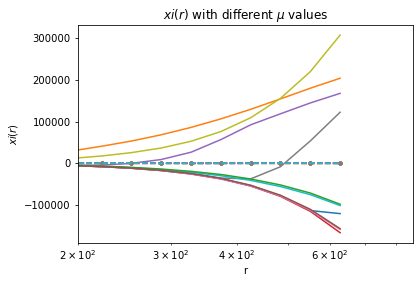

In [59]:
#for the simulation xi(r,mu)
xi_simul = np.zeros(nbins)
r        = np.zeros(nbins)
set_bins = '123456789e'
xi_f     = np.zeros(nbins)


xi_test= np.zeros(nbins)
for ii in range (0,nmu_bins):   
    j = ii
    a = 0
    while j < nmu_bins*nbins: 
        xi_simul[a] = DD_r_mu[j]/(RR[a]/nmu_bins) - 1      
        r[a]        = r_mu[j]
        xi_f[a]     = DDsmu_f[j]/(RR[a]/nmu_bins) - 1 
        xi_test[a]    = DDsmu_test[j]/(RR[a]/nmu_bins) - 1 
        
        a           = a + 1
        j           = j + nmu_bins
        

    plt.semilogx(r, xi_simul*r**2, '.', label = 'mu=0.' +  set_bins[ii])
    plt.plot(r, xi_f*r**2, '-', label = 'mu=0.' +  set_bins[ii])
    plt.plot(r, xi_test*r**2, '--', label = 'mu=0.' +  set_bins[ii])
    
    plt.xlim(200,)
    #plt.ylim(1e7,1e8)
    plt.title('$xi(r)$ with different $\mu$ values')
    plt.ylabel('$xi(r)$')
    plt.xlabel('r')
    #plt.legend(loc=(1.1,0))

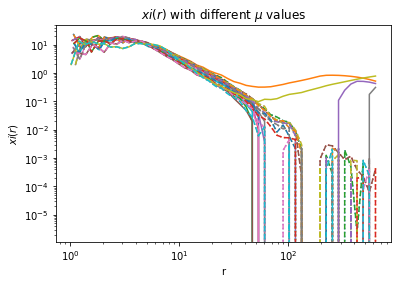

In [60]:
#for the simulation xi(r,mu)
xi_simul = np.zeros(nbins)
r        = np.zeros(nbins)
set_bins = '123456789e'
xi_f     = np.zeros(nbins)


xi_test= np.zeros(nbins)
for ii in range (0,nmu_bins):   
    j = ii
    a = 0
    while j < nmu_bins*nbins: 
        xi_simul[a] = DD_r_mu[j]/(RR[a]/nmu_bins) - 1      
        r[a]        = r_mu[j]
        xi_f[a]     = DDsmu_f[j]/(RR[a]/nmu_bins) - 1 
        xi_test[a]  = DDsmu_test[j]/(RR[a]/nmu_bins) - 1 
         
        
        a           = a + 1
        j           = j + nmu_bins
        

    plt.loglog(r, xi_simul, ':', label = 'mu=0.' +  set_bins[ii])
    plt.plot(r, xi_f, '-', label = 'mu=0.' +  set_bins[ii])
    plt.plot(r, xi_test, '--', label = 'mu=0.' +  set_bins[ii])
    
    #plt.xlim(300,)
    #plt.ylim(1e7,1e8)
    plt.title('$xi(r)$ with different $\mu$ values')
    plt.ylabel('$xi(r)$')
    plt.xlabel('r')
    #plt.legend(loc=(1.1,0))